In [529]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [530]:
df = pd.DataFrame({
    'miRNA': ['miR21', 'miR21', 'miR21', 'miR21', 'miR21','miR21', 
              'miR-let-7c', 'miR-let-7c','miR-let-7c','miR-let-7c','miR-let-7c','miR-let-7c',
              'miR-1033', 'miR-1033','miR-1033','miR-1033','miR-1033','miR-1033','miR-1033','miR-1033',
              'miR-34','miR-34','miR-34','miR-34','miR-34','miR-34','miR-34','miR-34',
             'miR21', 'miR21', 'miR21', 'miR21', 'miR21','miR21'], 
    'region_pair': [20,21,22,23,24,25,
                   21,22,23,24,25,26,
                   45,46,47,48,49,50,51,52,
                   67,68,69,70,71,72,73,74,
                   80,81,82,83,84,85],
    'unique_region': [1,1,1,1,1,1,
                      2,2,2,2,2,2,
                      1,1,1,1,1,1,1,1,
                      1,1,1,1,1,1,1,1,
                     1,1,1,1,1,1],
    'group': ['shared'] * 6 + ['shared'] * 6 + ['gst1'] * 8 + ['gst2'] * 8 +['shared'] * 6,
    'rep':[1] * 6 + [1] * 6 + [1] * 8 + [1] * 8 +[2] * 6,
})
df

,miRNA,region_pair,unique_region,group,rep
0,miR21,20,1,shared,1
1,miR21,21,1,shared,1
2,miR21,22,1,shared,1
3,miR21,23,1,shared,1
4,miR21,24,1,shared,1
5,miR21,25,1,shared,1
6,miR-let-7c,21,2,shared,1
7,miR-let-7c,22,2,shared,1
8,miR-let-7c,23,2,shared,1
9,miR-let-7c,24,2,shared,1


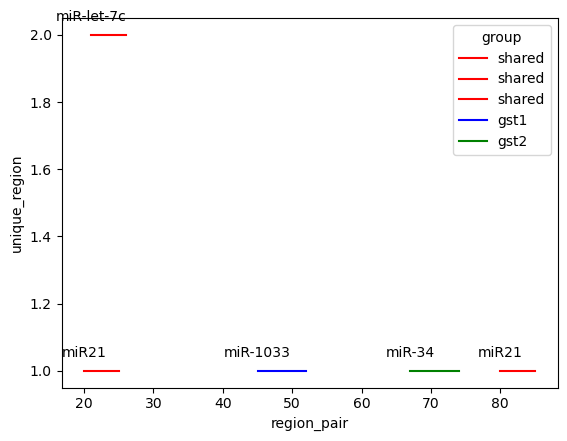

In [531]:

for i in df.miRNA.unique():
    df_i = df[df['miRNA']==i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep']==j]
        sns.lineplot(data=df_ij, x='region_pair', y='unique_region', hue = 'group', 
                 palette = {'shared': 'red', 'gst1': 'blue', 'gst2':'green'})


# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df.groupby(by=['miRNA', 'rep']).first().reset_index()

for i in range(len(grouped)):
    plt.annotate(grouped['miRNA'][i], (grouped['region_pair'][i], grouped['unique_region'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [532]:
df2 = pd.DataFrame({
    'miRNA': ['miR21', 'miR-let-7c', 'miR-1033', 'miR-34', 'miR21'], 
    'region_pair': ['20-26', '21-27', '45-54', '67-78', '80-85'],
    'group': ['shared', 'shared', 'gst1', 'gst2', 'shared']
})
df2

,miRNA,region_pair,group
0,miR21,20-26,shared
1,miR-let-7c,21-27,shared
2,miR-1033,45-54,gst1
3,miR-34,67-78,gst2
4,miR21,80-85,shared


In [533]:
df.head()

,miRNA,region_pair,unique_region,group,rep
0,miR21,20,1,shared,1
1,miR21,21,1,shared,1
2,miR21,22,1,shared,1
3,miR21,23,1,shared,1
4,miR21,24,1,shared,1


In [534]:
df2['rep'] = df2.groupby('miRNA').cumcount() + 1
df2

,miRNA,region_pair,group,rep
0,miR21,20-26,shared,1
1,miR-let-7c,21-27,shared,1
2,miR-1033,45-54,gst1,1
3,miR-34,67-78,gst2,1
4,miR21,80-85,shared,2


In [535]:
lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split('-')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split('-')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])
lst

[['miR21', 'miR-let-7c'], ['miR-let-7c', 'miR21']]

In [536]:
# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]
result

[['miR-let-7c', 'miR21']]

In [537]:
miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]
miRNA_dict_list

[{'miR-let-7c': 1, 'miR21': 2}]

In [538]:
# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)
df2

,miRNA,region_pair,group,rep,mapped_value
0,miR21,20-26,shared,1,2
1,miR-let-7c,21-27,shared,1,1
2,miR-1033,45-54,gst1,1,1
3,miR-34,67-78,gst2,1,1
4,miR21,80-85,shared,2,2


In [539]:
# Crear un nuevo DataFrame para almacenar los resultados
df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split('-')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result

,miRNA,region_pair,group,rep,position,value,mapped_value
0,miR21,20-26,shared,1,start,20,2.0
1,miR21,20-26,shared,1,end,26,2.0
2,miR-let-7c,21-27,shared,1,start,21,1.0
3,miR-let-7c,21-27,shared,1,end,27,1.0
4,miR-1033,45-54,gst1,1,start,45,1.0
5,miR-1033,45-54,gst1,1,end,54,1.0
6,miR-34,67-78,gst2,1,start,67,1.0
7,miR-34,67-78,gst2,1,end,78,1.0
8,miR21,80-85,shared,2,start,80,2.0
9,miR21,80-85,shared,2,end,85,2.0


In [540]:
df_result['value'] = list(map(float, df_result['value'] ))

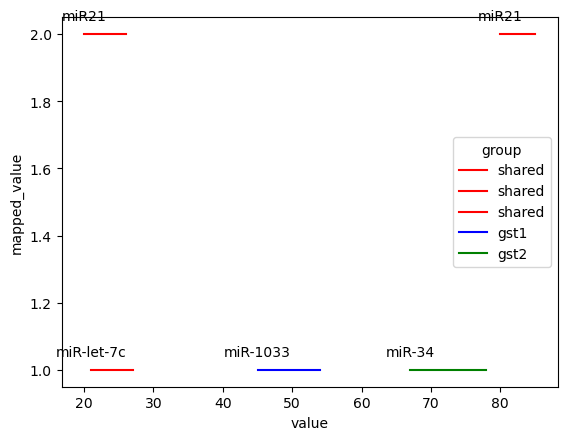

In [541]:
for i in df_result.miRNA.unique():
    df_i = df_result[df_result['miRNA']==i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep']==j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue = 'group', 
                 palette = {'shared': 'red', 'gst1': 'blue', 'gst2':'green'})


# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result.groupby(by=['miRNA', 'rep']).first().reset_index()

for i in range(len(grouped)):
    plt.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Real

In [542]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]
dfsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
2,ErbB signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
4,HIF-1 signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
5,Insulin signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
8,Neurotrophin signaling pathway,0.039387,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
13,Thyroid hormone signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
...,...,...,...,...,...,...,...,...,...
4780,Thyroid hormone signaling pathway,0.005220,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4784,VEGF signaling pathway,0.003531,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4785,mTOR signaling pathway,0.005432,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4789,Rap1 signaling pathway,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"


In [543]:
def recalibrate_region(UTR_region, InteractionRegionUTR):
    x = UTR_region.split(':')[1]
    start_utr, end_utr = x.split('-')
    
    start_interaction, end_interaction = InteractionRegionUTR.split(',')
    return str(int(start_utr) + int(start_interaction)) + ','+ str(int(start_utr) + int(end_interaction))
dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))
dfsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
2,ErbB signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
4,HIF-1 signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
5,Insulin signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
8,Neurotrophin signaling pathway,0.039387,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
13,Thyroid hormone signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"95,115"
...,...,...,...,...,...,...,...,...,...
4780,Thyroid hormone signaling pathway,0.005220,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"29857,29876"
4784,VEGF signaling pathway,0.003531,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"29857,29876"
4785,mTOR signaling pathway,0.005432,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"29857,29876"
4789,Rap1 signaling pathway,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"29714,29723"


In [544]:
dfsp = dfsp[dfsp['Region']=="5'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]

In [545]:
g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

2, 0,2,1, 30


In [546]:
list(ug1)

['hsa-miR-7-1-3p', 'hsa-miR-206']

In [547]:
def eval_miRNA(miRNA):
    if miRNA in list(ug1):
        return 'ug1'
    elif miRNA in list(ug2):
        return 'ug2'
    elif miRNA in list(ug3):
        return 'ug3'
    elif miRNA in list(ug4):
        return 'ug4'
    elif miRNA in list(ugG):
        return 'ugG'
    else:
        return 'NaN'

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA)
dfsp = dfsp[dfsp['group']!= 'NaN']
dfsp

,miRNA,Variant,InteractionRegionUTR,group
2,hsa-miR-193a-5p,Gs4,"95,115",ugG
4,hsa-miR-193a-5p,Gs4,"95,115",ugG
5,hsa-miR-193a-5p,Gs4,"95,115",ugG
8,hsa-miR-193a-5p,Gs4,"95,115",ugG
13,hsa-miR-193a-5p,Gs4,"95,115",ugG
...,...,...,...,...
4644,hsa-miR-497-5p,Gs1,"258,268",ugG
4651,hsa-miR-497-5p,Gs1,"258,268",ugG
4652,hsa-miR-497-5p,Gs1,"258,268",ugG
4654,hsa-miR-497-5p,Gs1,"258,268",ugG


In [548]:
dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']
dfsp

,miRNA,region_pair,group
2,hsa-miR-193a-5p,"95,115",ugG
65,hsa-let-7b-5p,"101,124",ugG
234,hsa-miR-486-3p,"84,103",ugG
256,hsa-miR-34c-5p,"91,114",ugG
344,hsa-miR-33a-5p,"102,121",ugG
360,hsa-miR-199a-3p,"184,196",ugG
457,hsa-miR-342-3p,"259,269",ugG
480,hsa-miR-193a-5p,"199,210",ugG
496,hsa-miR-324-3p,"225,239",ugG
506,hsa-miR-324-3p,"226,240",ugG


In [549]:
df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1
df2

/tmp/ipykernel_4400/3707261845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rep'] = df2.groupby('miRNA').cumcount() + 1


,miRNA,region_pair,group,rep
2,hsa-miR-193a-5p,"95,115",ugG,1
65,hsa-let-7b-5p,"101,124",ugG,1
234,hsa-miR-486-3p,"84,103",ugG,1
256,hsa-miR-34c-5p,"91,114",ugG,1
344,hsa-miR-33a-5p,"102,121",ugG,1
360,hsa-miR-199a-3p,"184,196",ugG,1
457,hsa-miR-342-3p,"259,269",ugG,1
480,hsa-miR-193a-5p,"199,210",ugG,2
496,hsa-miR-324-3p,"225,239",ugG,1
506,hsa-miR-324-3p,"226,240",ugG,2


In [550]:
lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]
result

[['hsa-miR-18b-5p',
  'hsa-miR-25-3p',
  'hsa-miR-324-3p',
  'hsa-miR-199a-3p',
  'hsa-miR-124-3p',
  'hsa-miR-154-5p',
  'hsa-miR-503-5p',
  'hsa-miR-486-3p',
  'hsa-miR-378a-3p',
  'hsa-miR-18a-5p',
  'hsa-miR-148b-3p',
  'hsa-miR-193a-5p',
  'hsa-miR-101-5p',
  'hsa-miR-340-5p',
  'hsa-miR-21-3p',
  'hsa-miR-34c-5p',
  'hsa-miR-15b-5p',
  'hsa-miR-92b-3p',
  'hsa-miR-182-5p',
  'hsa-miR-342-3p',
  'hsa-miR-95-3p',
  'hsa-miR-186-5p',
  'hsa-miR-33a-5p',
  'hsa-miR-29a-5p',
  'hsa-miR-497-5p',
  'hsa-let-7b-5p',
  'hsa-miR-324-5p',
  'hsa-miR-223-3p',
  'hsa-miR-7-1-3p',
  'hsa-miR-501-5p',
  'hsa-miR-369-5p',
  'hsa-miR-23b-3p',
  'hsa-miR-200c-3p']]

In [551]:
miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]
miRNA_dict_list

[{'hsa-miR-18b-5p': 1,
  'hsa-miR-25-3p': 2,
  'hsa-miR-324-3p': 3,
  'hsa-miR-199a-3p': 4,
  'hsa-miR-124-3p': 5,
  'hsa-miR-154-5p': 6,
  'hsa-miR-503-5p': 7,
  'hsa-miR-486-3p': 8,
  'hsa-miR-378a-3p': 9,
  'hsa-miR-18a-5p': 10,
  'hsa-miR-148b-3p': 11,
  'hsa-miR-193a-5p': 12,
  'hsa-miR-101-5p': 13,
  'hsa-miR-340-5p': 14,
  'hsa-miR-21-3p': 15,
  'hsa-miR-34c-5p': 16,
  'hsa-miR-15b-5p': 17,
  'hsa-miR-92b-3p': 18,
  'hsa-miR-182-5p': 19,
  'hsa-miR-342-3p': 20,
  'hsa-miR-95-3p': 21,
  'hsa-miR-186-5p': 22,
  'hsa-miR-33a-5p': 23,
  'hsa-miR-29a-5p': 24,
  'hsa-miR-497-5p': 25,
  'hsa-let-7b-5p': 26,
  'hsa-miR-324-5p': 27,
  'hsa-miR-223-3p': 28,
  'hsa-miR-7-1-3p': 29,
  'hsa-miR-501-5p': 30,
  'hsa-miR-369-5p': 31,
  'hsa-miR-23b-3p': 32,
  'hsa-miR-200c-3p': 33}]

In [552]:
# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)
df2

/tmp/ipykernel_4400/3128383726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)


,miRNA,region_pair,group,rep,mapped_value
2,hsa-miR-193a-5p,"95,115",ugG,1,12
65,hsa-let-7b-5p,"101,124",ugG,1,26
234,hsa-miR-486-3p,"84,103",ugG,1,8
256,hsa-miR-34c-5p,"91,114",ugG,1,16
344,hsa-miR-33a-5p,"102,121",ugG,1,23
360,hsa-miR-199a-3p,"184,196",ugG,1,4
457,hsa-miR-342-3p,"259,269",ugG,1,20
480,hsa-miR-193a-5p,"199,210",ugG,2,12
496,hsa-miR-324-3p,"225,239",ugG,1,3
506,hsa-miR-324-3p,"226,240",ugG,2,3


In [553]:
# Crear un nuevo DataFrame para almacenar los resultados
df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result

,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-193a-5p,"95,115",ugG,1,start,95,12.0
1,hsa-miR-193a-5p,"95,115",ugG,1,end,115,12.0
2,hsa-let-7b-5p,"101,124",ugG,1,start,101,26.0
3,hsa-let-7b-5p,"101,124",ugG,1,end,124,26.0
4,hsa-miR-486-3p,"84,103",ugG,1,start,84,8.0
...,...,...,...,...,...,...,...
91,hsa-miR-378a-3p,"257,263",ugG,1,end,263,9.0
92,hsa-miR-340-5p,"197,207",ugG,2,start,197,14.0
93,hsa-miR-340-5p,"197,207",ugG,2,end,207,14.0
94,hsa-miR-497-5p,"258,268",ugG,2,start,258,25.0


In [554]:
df_result['value'] = list(map(float, df_result['value'] ))
df_result1 = df_result

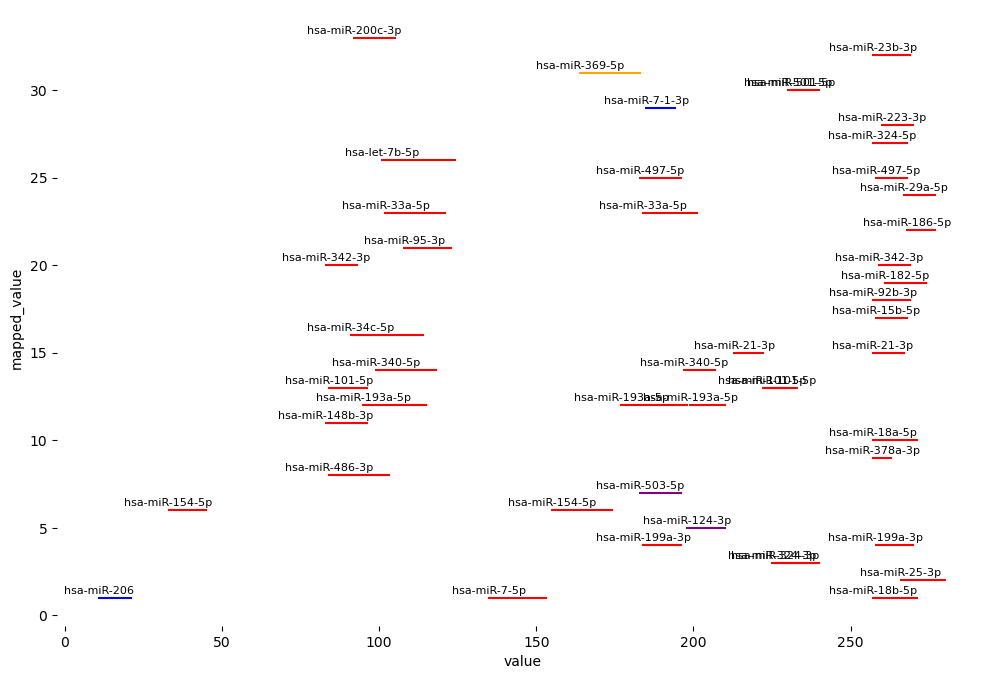

In [555]:
fig, ax1 = plt.subplots(figsize=(12, 8))
for i in df_result.miRNA.unique():
    df_i = df_result[df_result['miRNA']==i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep']==j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue = 'group', 
                 palette = {'ugG': 'red', 'ug1': 'blue', 'ug2':'green','ug3': 'purple', 'ug4': 'orange'}, legend = False, ax = ax1)



# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result.groupby(by=['miRNA', 'rep']).first().reset_index()

for i in range(len(grouped)):
    plt.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0,3), ha='center', fontsize=8)


sns.despine(left=True, bottom=True)
plt.show()

# 3 UTR

In [556]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

dfsp = dfsp[dfsp['Region']=="3'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]


g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA)
dfsp = dfsp[dfsp['group']!= 'NaN']

dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']

df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1

lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]

miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]

# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)

df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result['value'] = list(map(float, df_result['value'] ))
df_result2 = df_result
df_result

5, 0,4,0, 6


,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-199a-3p,"29703,29719",ugG,1,start,29703.0,4.0
1,hsa-miR-199a-3p,"29703,29719",ugG,1,end,29719.0,4.0
2,hsa-miR-449b-5p,"29762,29776",ug1,1,start,29762.0,10.0
3,hsa-miR-449b-5p,"29762,29776",ug1,1,end,29776.0,10.0
4,hsa-miR-324-5p,"29839,29851",ugG,1,start,29839.0,6.0
...,...,...,...,...,...,...,...
67,hsa-miR-135a-5p,"29827,29836",ugG,7,end,29836.0,8.0
68,hsa-miR-23b-3p,"29836,29847",ugG,2,start,29836.0,13.0
69,hsa-miR-23b-3p,"29836,29847",ugG,2,end,29847.0,13.0
70,hsa-miR-92b-3p,"29756,29763",ug1,1,start,29756.0,2.0


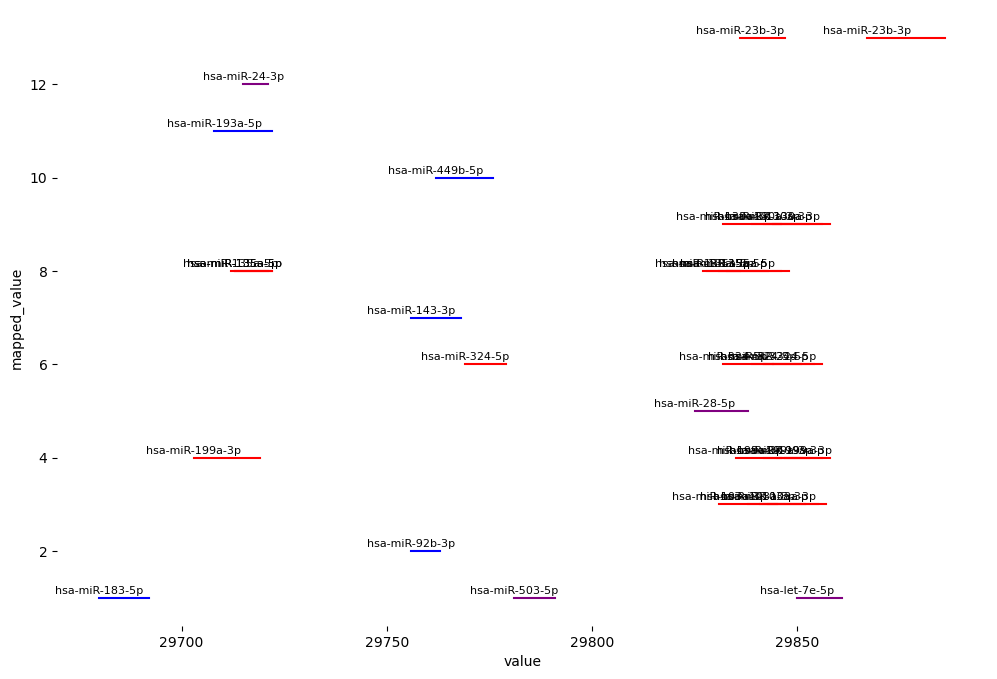

In [557]:
fig2 = plt.figure(figsize=(12, 8))
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA']==i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep']==j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue = 'group', 
                 palette = {'ugG': 'red', 'ug1': 'blue', 'ug2':'green','ug3': 'purple', 'ug4': 'orange'}, legend = False)



# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()

for i in range(len(grouped)):
    plt.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0,3), ha='center', fontsize=8)


sns.despine(left=True, bottom=True)
plt.show()

# ajuste custom

In [558]:
df_result2[df_result2['miRNA']=='hsa-miR-103a-3p']

,miRNA,region_pair,group,rep,position,value,mapped_value
12,hsa-miR-103a-3p,"29843,29857",ugG,1,start,29843.0,3.0
13,hsa-miR-103a-3p,"29843,29857",ugG,1,end,29857.0,3.0
14,hsa-miR-103a-3p,"29841,29855",ugG,2,start,29841.0,3.0
15,hsa-miR-103a-3p,"29841,29855",ugG,2,end,29855.0,3.0
16,hsa-miR-103a-3p,"29831,29845",ugG,3,start,29831.0,3.0
17,hsa-miR-103a-3p,"29831,29845",ugG,3,end,29845.0,3.0
18,hsa-miR-103a-3p,"29838,29852",ugG,4,start,29838.0,3.0
19,hsa-miR-103a-3p,"29838,29852",ugG,4,end,29852.0,3.0


In [559]:
df_result1.drop([38, 39, 18, 19, 56, 57], inplace = True)

df_result2.drop([14,15,16,17,18,19, 26,27,28,29,30,31,32,33, 
                 50, 51, 52, 53, 56, 57, 36,37, 38, 39, 40, 41, 54, 55, 
                 60, 61, 66, 67, 6,7,8,9,10,11,42,43], inplace = True)

# Merge

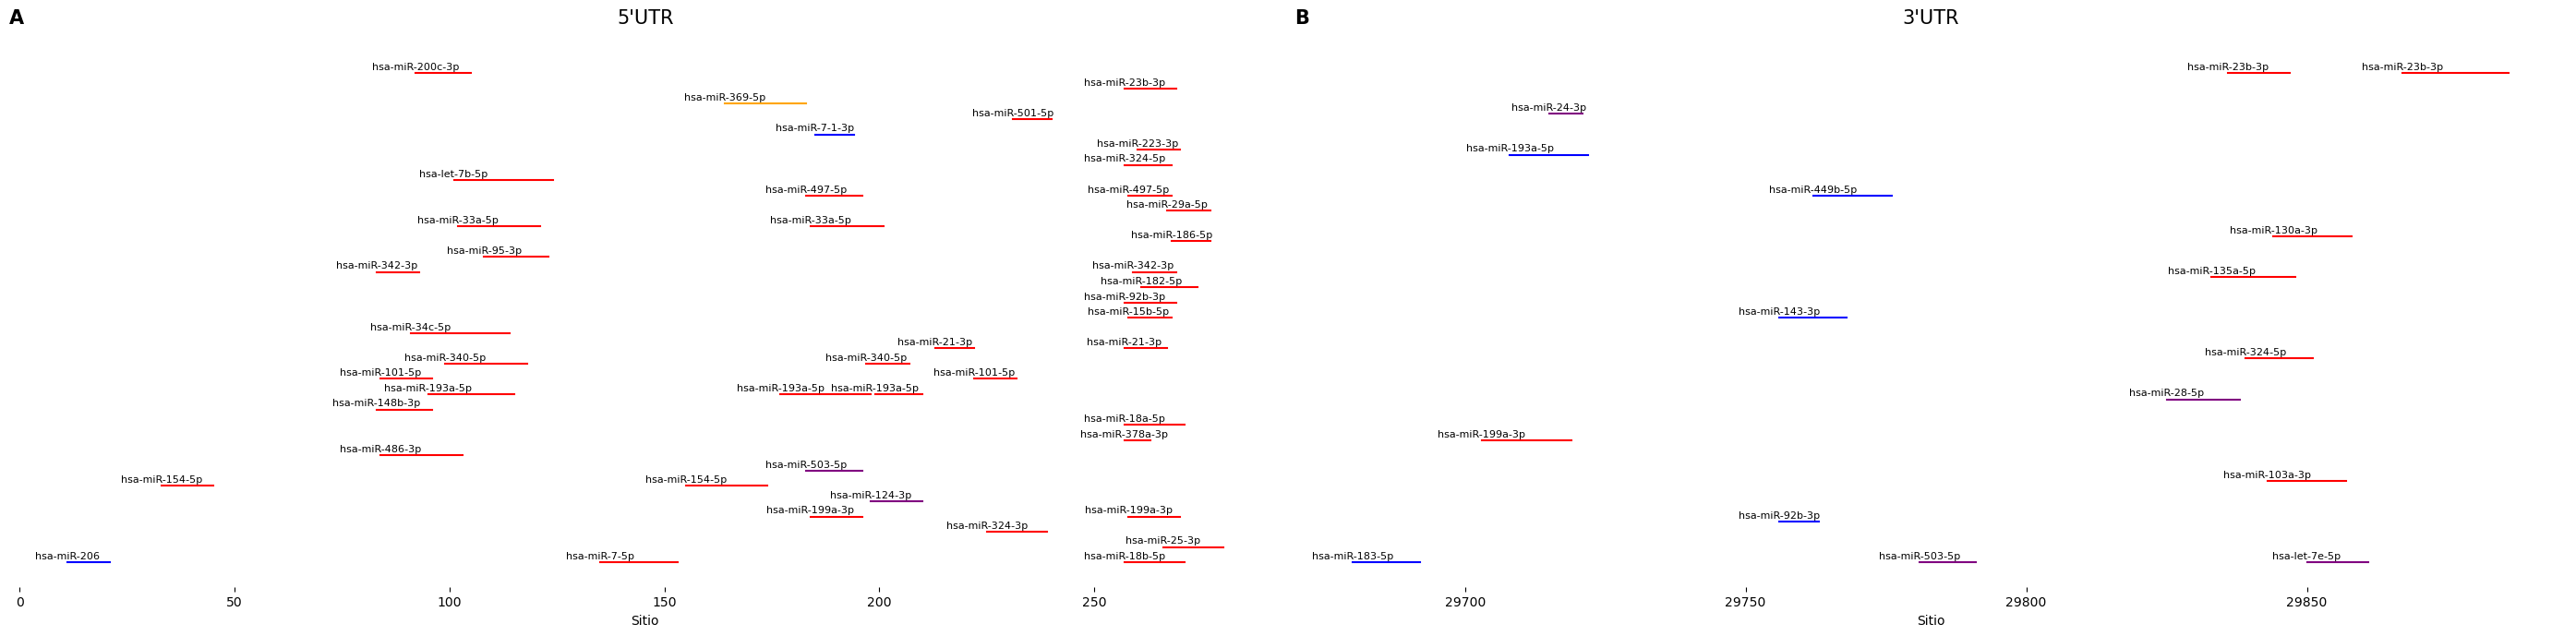

In [582]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 7))

# Primer gráfico
for i in df_result1.miRNA.unique():
    df_i = df_result1[df_result1['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax1)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result1.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax1.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)


sns.despine(left=True, bottom=True, ax=ax1)


# Segundo gráfico
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax2)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax2.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)

sns.despine(left=True, bottom=True, ax=ax2)
ax1.set_title('A', fontweight="bold", loc = 'left', fontsize=15)
ax1.set_title("5'UTR", fontsize=15, pad=20)


ax2.set_title('B', fontweight="bold", loc = 'left', fontsize=15)
ax2.set_title("3'UTR", fontsize=15, pad=20)

ax1.set_xlabel('Sitio')
ax2.set_xlabel('Sitio')

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_yticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('../../Plots/miRNA_predicted_geoCluster.pdf')
plt.show()

# Constant Clusters

In [585]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

dfsp = dfsp[dfsp['Region']=="5'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]


g1 = list(dfsp[dfsp['Variant']=='Gst1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gst2']['miRNA'])



ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

#print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA)
dfsp = dfsp[dfsp['group']!= 'NaN']

dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']

df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1

lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]

miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]

# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)

df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result['value'] = list(map(float, df_result['value'] ))
df_result1 = df_result
df_result1

,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-503-5p,"52,68",ug3,1,start,52.0,13.0
1,hsa-miR-503-5p,"52,68",ug3,1,end,68.0,13.0
2,hsa-miR-193a-5p,"95,115",ugG,1,start,95.0,23.0
3,hsa-miR-193a-5p,"95,115",ugG,1,end,115.0,23.0
4,hsa-let-7b-5p,"101,124",ug1,1,start,101.0,44.0
...,...,...,...,...,...,...,...
145,hsa-miR-378a-3p,"257,263",ugG,1,end,263.0,18.0
146,hsa-miR-199a-3p,"258,270",ugG,2,start,258.0,5.0
147,hsa-miR-199a-3p,"258,270",ugG,2,end,270.0,5.0
148,hsa-miR-497-5p,"258,268",ugG,2,start,258.0,41.0


In [586]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfsp['InteractionRegionUTR'] = list(map(recalibrate_region, dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

dfsp = dfsp[dfsp['Region']=="3'UTR"]
dfsp = dfsp[['miRNA', 'Variant', 'InteractionRegionUTR']]


g1 = list(dfsp[dfsp['Variant']=='Gst1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gst2']['miRNA'])



ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

#print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

dfsp['group'] = dfsp['miRNA'].apply(eval_miRNA)
dfsp = dfsp[dfsp['group']!= 'NaN']

dfsp.drop(['Variant'], axis = 1, inplace = True)
dfsp = dfsp.drop_duplicates()
dfsp.columns = ['miRNA', 'region_pair', 'group']

df2 = dfsp
df2['rep'] = df2.groupby('miRNA').cumcount() + 1

lst = []
for i,k in zip(df2.region_pair, df2.miRNA):
    start, end = i.split(',')
    x = list(range(int(start), int(end) + 1))
    
    for j,l in zip(df2.region_pair, df2.miRNA):
        if i != j:            
            start2, end2 = j.split(',')
            y = list(range(int(start2), int(end2) + 1))
            d = set(x) & set(y)
            if len(d) > 0:
                lst.append([k,l])

# Crear un DataFrame
dfn = pd.DataFrame(lst, columns=['miRNA1', 'miRNA2'])

# Crear un grafo
G = nx.Graph()
G.add_edges_from(dfn.values)

# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

# Convertir a lista de listas
result = [list(component) for component in connected_components]

miRNA_dict_list = [{miRNA: idx + 1 for idx, miRNA in enumerate(sublist)} for sublist in result]

# Crear un diccionario vacío
diccionario_combinado = {}

# Iterar sobre cada diccionario en la lista
for dic in miRNA_dict_list:
    diccionario_combinado.update(dic)

df2['mapped_value'] = df2['miRNA'].map(diccionario_combinado).fillna(1).astype(int)

df_result = pd.DataFrame(columns=['miRNA', 'region_pair', 'group', 'rep', 'position', 'value'])

# Separar 'region_pair' en 'start' y 'end' y añadir a df_result
for index, row in df2.iterrows():
    start, end = row['region_pair'].split(',')
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'start',
        'value': start,
         'mapped_value': row['mapped_value']
    }, ignore_index=True)
    df_result = df_result._append({
        'miRNA': row['miRNA'],
        'region_pair': row['region_pair'],
        'group': row['group'],
        'rep': row['rep'],
        'position': 'end',
        'value': end, 
        'mapped_value': row['mapped_value']
    }, ignore_index=True)

df_result['value'] = list(map(float, df_result['value'] ))
df_result2 = df_result
df_result2

,miRNA,region_pair,group,rep,position,value,mapped_value
0,hsa-miR-486-3p,"29781,29791",ugG,1,start,29781.0,7.0
1,hsa-miR-486-3p,"29781,29791",ugG,1,end,29791.0,7.0
2,hsa-miR-486-3p,"29825,29835",ugG,2,start,29825.0,7.0
3,hsa-miR-486-3p,"29825,29835",ugG,2,end,29835.0,7.0
4,hsa-miR-183-5p,"29831,29849",ug1,1,start,29831.0,22.0
...,...,...,...,...,...,...,...
83,hsa-miR-224-5p,"29850,29862",ug1,1,end,29862.0,14.0
84,hsa-miR-181d-5p,"29734,29742",ugG,2,start,29734.0,28.0
85,hsa-miR-181d-5p,"29734,29742",ugG,2,end,29742.0,28.0
86,hsa-miR-32-5p,"29834,29846",ug1,1,start,29834.0,17.0


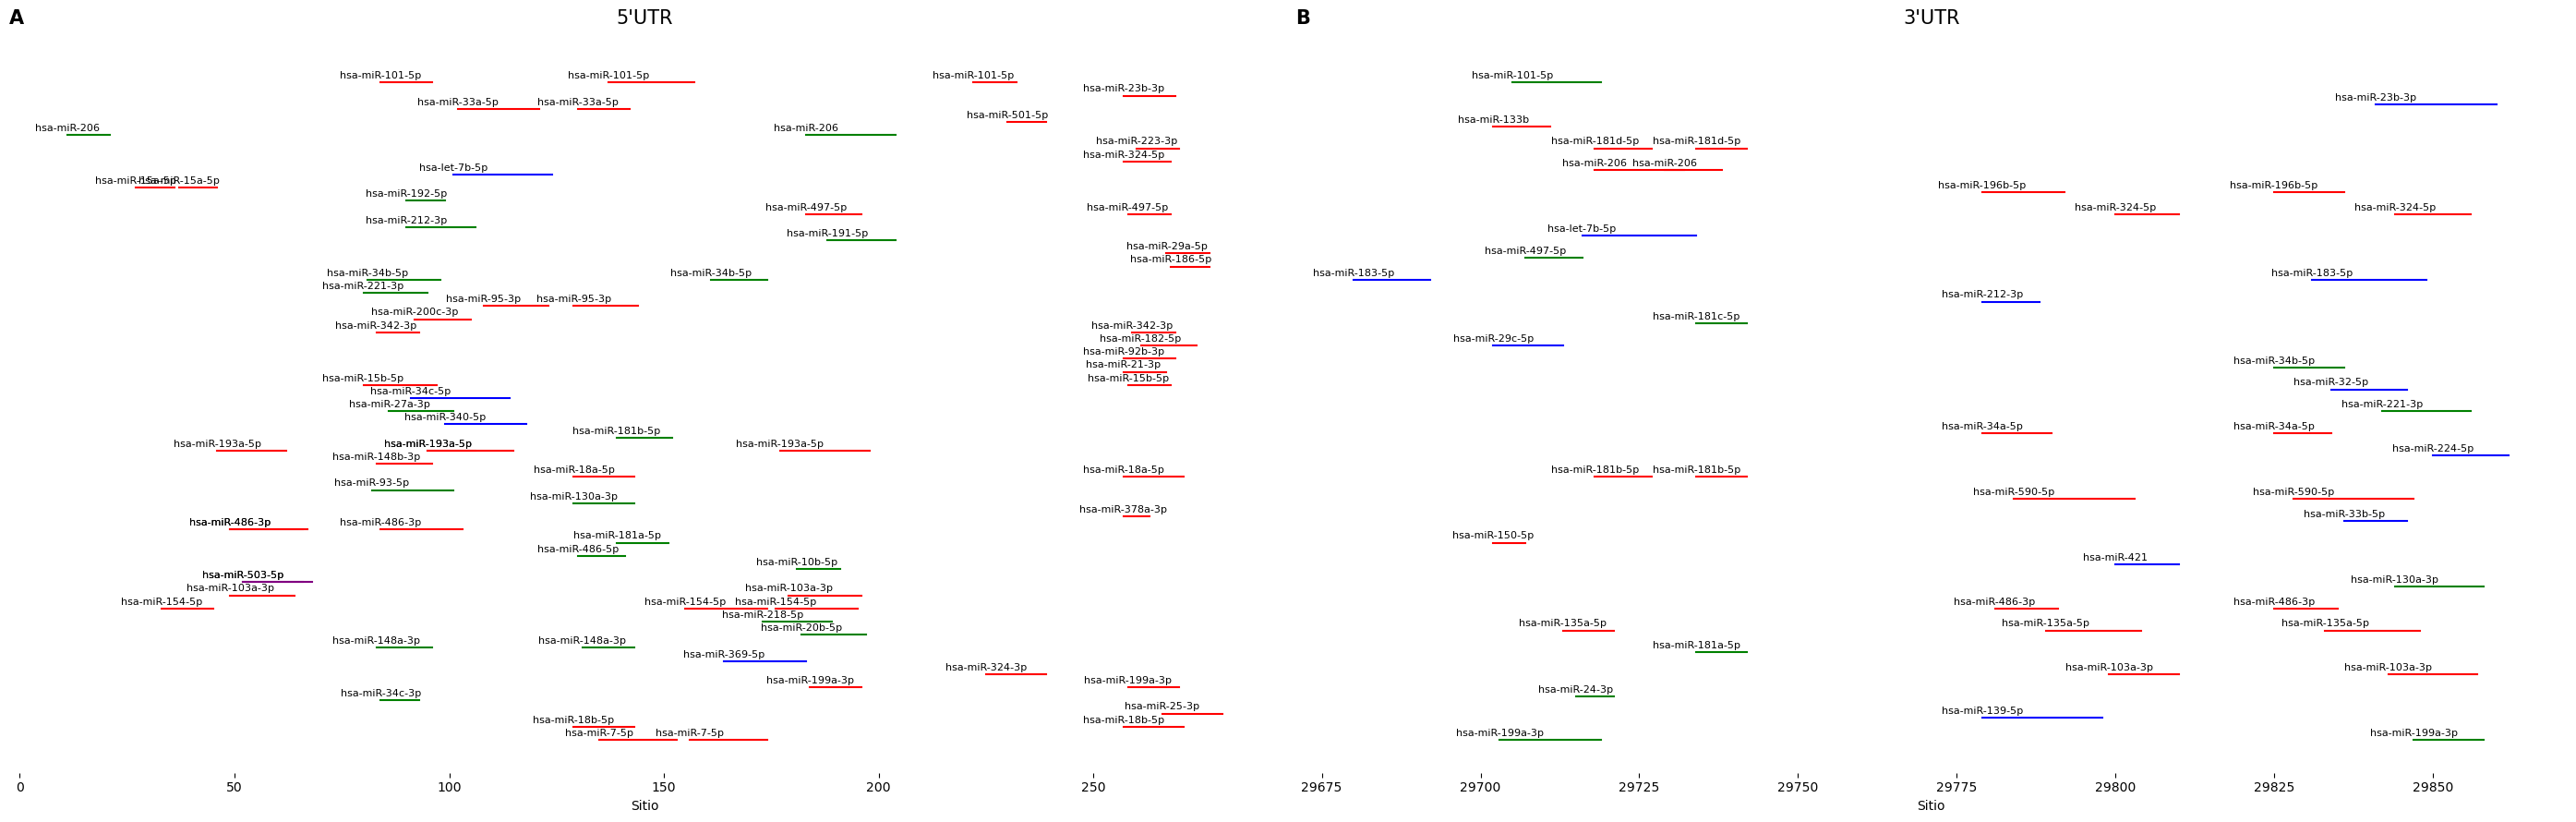

In [589]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 9))

# Primer gráfico
for i in df_result1.miRNA.unique():
    df_i = df_result1[df_result1['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax1)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result1.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax1.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)


sns.despine(left=True, bottom=True, ax=ax1)


# Segundo gráfico
for i in df_result2.miRNA.unique():
    df_i = df_result2[df_result2['miRNA'] == i]
    for j in df_i.rep.unique():
        df_ij = df_i[df_i['rep'] == j]
        sns.lineplot(data=df_ij, x='value', y='mapped_value', hue='group', 
                     palette={'ugG': 'red', 'ug1': 'blue', 'ug2': 'green', 'ug3': 'purple', 'ug4': 'orange'}, 
                     legend=False, ax=ax2)

# Agrupar por miRNA y anotar solo el primer punto de cada grupo
grouped = df_result2.groupby(by=['miRNA', 'rep']).first().reset_index()
for i in range(len(grouped)):
    ax2.annotate(grouped['miRNA'][i], (grouped['value'][i], grouped['mapped_value'][i]), textcoords="offset points", 
                 xytext=(0, 3), ha='center', fontsize=8)

sns.despine(left=True, bottom=True, ax=ax2)
ax1.set_title('A', fontweight="bold", loc = 'left', fontsize=15)
ax1.set_title("5'UTR", fontsize=15, pad=20)


ax2.set_title('B', fontweight="bold", loc = 'left', fontsize=15)
ax2.set_title("3'UTR", fontsize=15, pad=20)

ax1.set_xlabel('Sitio')
ax2.set_xlabel('Sitio')

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_yticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig('../../Plots/miRNA_predicted_geoConstantCluster.pdf')
plt.show()